# 1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import pydotplus
from IPython.display import Image 

from sklearn.feature_selection import RFE

# 2 Data Preparation

### 2.1 Read Data

In [2]:
df = pd.read_csv('D:/DSE/Capstone Project/DataCo/DataCoSupplyChainDataset.csv', encoding='latin')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### 2.2 Check the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
# Converting Datetime Variables
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day

df.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1,inplace=True)
df.drop(['order_date'],axis=1,inplace=True)

### 2.3 Remove Insignificant Varibles

In [7]:
# Dropping irrelevant columns
not_needed=['Product Image','Product Status','Customer Email','Customer Password','Customer Fname','Customer Lname','Product Name','Delivery Status']
df.drop(not_needed,axis=1,inplace=True)

In [8]:
# Dropping Duplicate Columns
dup_col = ['Product Category Id','Order Item Product Price','Order Item Cardprod Id','Order Profit Per Order','Sales per customer','Order Customer Id']
df.drop(dup_col,axis=1,inplace=True)

In [9]:
# Dropping Columns with many Missing Values
miss_percent = (df.isnull().sum()*100/df.isnull().count())
k = miss_percent[miss_percent>80]
df.drop(k.index,axis=1,inplace=True)

### 2.4 Distribution of Variables

In [10]:
category =  df.select_dtypes(include='object').columns
category

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Shipping Mode'],
      dtype='object')

In [11]:
numeric = df.select_dtypes(include='number').columns
numeric = numeric.drop('Late_delivery_risk')

In [12]:
numeric

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Customer Id', 'Customer Zipcode',
       'Department Id', 'Latitude', 'Longitude', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Product Card Id', 'Product Price', 'order_year',
       'order_month', 'order_day'],
      dtype='object')

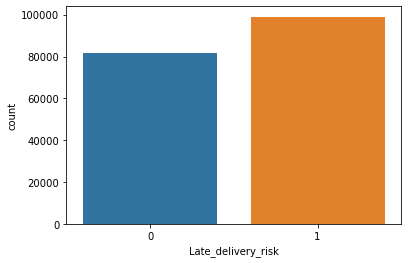

In [13]:
# Plotting Target Variable
sns.countplot(data=df, x='Late_delivery_risk')
plt.show()

### Missing Value Treatment

In [14]:
df.isnull().sum()>0

Type                             False
Days for shipping (real)         False
Days for shipment (scheduled)    False
Benefit per order                False
Late_delivery_risk               False
Category Id                      False
Category Name                    False
Customer City                    False
Customer Country                 False
Customer Id                      False
Customer Segment                 False
Customer State                   False
Customer Street                  False
Customer Zipcode                  True
Department Id                    False
Department Name                  False
Latitude                         False
Longitude                        False
Market                           False
Order City                       False
Order Country                    False
Order Id                         False
Order Item Discount              False
Order Item Discount Rate         False
Order Item Id                    False
Order Item Profit Ratio  

In [15]:
# For Customer Zipcode
cust_zip = df[df['Customer Zipcode'].isnull()]
cust_zip

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,CA,EE. UU.,14577,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,CA,EE. UU.,17171,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,CA,EE. UU.,14046,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


In [16]:
for i in cust_zip.index:
    df.iloc[i,df.columns.get_loc('Customer Zipcode')] = df.iloc[i,df.columns.get_loc('Customer State')]
    df.iloc[i,df.columns.get_loc('Customer State')]   = df.iloc[i,df.columns.get_loc('Customer City')]
    df.iloc[i,df.columns.get_loc('Customer City')]    = df.iloc[i,df.columns.get_loc('Customer Street')]


In [17]:
df['Customer Zipcode'] = df['Customer Zipcode'].astype('float')

In [18]:
df.iloc[cust_zip.index]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,Elk Grove,EE. UU.,14577,Consumer,CA,Elk Grove,95758.0,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,Elk Grove,EE. UU.,17171,Corporate,CA,Elk Grove,95758.0,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,El Monte,EE. UU.,14046,Consumer,CA,El Monte,91732.0,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


### 2.6 Label Encoding Categorical Variables

In [19]:
lbl=LabelEncoder()

for i in category:
    df[i] = lbl.fit_transform(df[i])
   

In [20]:
unwanted_cols =   ['Customer Id','Order Item Id','Product Card Id', 'Days for shipment (scheduled)','Days for shipping (real)', 
                   'Customer Street','Order Id','Longitude','Latitude']
df.drop(unwanted_cols,axis=1,inplace=True)

In [21]:
df.shape

(180519, 29)

In [22]:
feature_names  =  df.columns.drop('Late_delivery_risk')
print(feature_names)

Index(['Type', 'Benefit per order', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Region', 'Order State', 'Order Status',
       'Product Price', 'Shipping Mode', 'order_year', 'order_month',
       'order_day'],
      dtype='object')


### 2.7 Train Test Split

In [23]:
X = df.drop('Late_delivery_risk',axis=1)
y = df['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (144415, 28)
y_train (144415,)
X_test (36104, 28)
y_test (36104,)


#### Create a generalized function to calculate the metrics for the train and the test set.

In [24]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [25]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [26]:
def roc_auc_train(model):
    train_pred = model.predict(X_train)
    return(roc_auc_score(y_train, train_pred))

In [27]:
def roc_auc_test(model):
    test_pred = model.predict(X_test)
    return(roc_auc_score(y_test, test_pred))

In [28]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

In [29]:
%%time
decision_tree = decision_tree_classification.fit(X_train, y_train)

CPU times: total: 11.6 s
Wall time: 12 s


In [30]:
train_report = get_train_report(decision_tree)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65382
           1       1.00      1.00      1.00     79033

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415



In [31]:
test_report = get_test_report(decision_tree)

print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     16160
           1       0.86      0.85      0.85     19944

    accuracy                           0.84     36104
   macro avg       0.84      0.84      0.84     36104
weighted avg       0.84      0.84      0.84     36104



In [32]:
rf = RandomForestClassifier(criterion='entropy', random_state=10)

In [33]:
%%time
random_forest = rf.fit(X_train, y_train)

CPU times: total: 2min 59s
Wall time: 3min 12s


In [34]:
train_report_rf = get_train_report(random_forest)

print(train_report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65382
           1       1.00      1.00      1.00     79033

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415



In [35]:
test_report_rf = get_test_report(random_forest)

print(test_report_rf)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79     16160
           1       0.88      0.73      0.80     19944

    accuracy                           0.80     36104
   macro avg       0.80      0.80      0.80     36104
weighted avg       0.81      0.80      0.80     36104



In [36]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [37]:
from scipy.stats import randint as sp_randint

In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## ADA BOOST on DT

In [41]:
ada_dt = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=40, random_state=10)

In [42]:
%%time
ada_dt.fit(X_train, y_train)

CPU times: total: 8.95 s
Wall time: 9.03 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=10),
                   n_estimators=40, random_state=10)

In [44]:
ada_dt_train_rep = get_train_report(ada_dt)
print(ada_dt_train_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65382
           1       1.00      1.00      1.00     79033

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415



In [45]:
ada_dt_test_rep = get_test_report(ada_dt)
print(ada_dt_test_rep)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     16160
           1       0.86      0.85      0.86     19944

    accuracy                           0.84     36104
   macro avg       0.84      0.84      0.84     36104
weighted avg       0.84      0.84      0.84     36104



In [46]:
roc_auc_train(ada_dt)

1.0

In [47]:
roc_auc_test(ada_dt)

0.8395633392310349

## ADA BOOST on RF

In [48]:
ada_rf = AdaBoostClassifier(base_estimator=rf, n_estimators=40, random_state=10)

In [49]:
%%time
ada_rf.fit(X_train, y_train)

CPU times: total: 1min 41s
Wall time: 1min 48s


AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         random_state=10),
                   n_estimators=40, random_state=10)

In [50]:
ada_rf_train_rep = get_train_report(ada_rf)
print(ada_rf_train_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65382
           1       1.00      1.00      1.00     79033

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415



In [51]:
ada_rf_test_rep = get_test_report(ada_rf)
print(ada_rf_test_rep)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79     16160
           1       0.88      0.72      0.79     19944

    accuracy                           0.79     36104
   macro avg       0.80      0.80      0.79     36104
weighted avg       0.81      0.79      0.79     36104



In [52]:
roc_auc_train(ada_rf)

1.0

In [53]:
roc_auc_test(ada_rf)

0.8008650086579054

## Gradient Boost

In [54]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, random_state = 10)

In [55]:
%%time
gboost_model.fit(X_train, y_train)

CPU times: total: 2min 10s
Wall time: 2min 25s


GradientBoostingClassifier(n_estimators=150, random_state=10)

In [56]:
gboost_train_rep = get_train_report(gboost_model)
print(gboost_train_rep)

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     65382
           1       0.87      0.57      0.69     79033

    accuracy                           0.72    144415
   macro avg       0.75      0.73      0.71    144415
weighted avg       0.76      0.72      0.71    144415



In [57]:
gboost_test_rep = get_test_report(gboost_model)
print(gboost_test_rep)

              precision    recall  f1-score   support

           0       0.62      0.89      0.73     16160
           1       0.87      0.56      0.68     19944

    accuracy                           0.71     36104
   macro avg       0.75      0.73      0.71     36104
weighted avg       0.76      0.71      0.71     36104



In [58]:
roc_auc_train(gboost_model)

0.7315862347145563

In [59]:
roc_auc_test(gboost_model)

0.7286452934553385

## XGBoost

In [60]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

In [61]:
%%time
xgb_model.fit(X_train, y_train)

CPU times: total: 1min 57s
Wall time: 46.1 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
xgb_train_rep = get_train_report(xgb_model)
print(xgb_train_rep)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     65382
           1       0.95      0.87      0.91     79033

    accuracy                           0.90    144415
   macro avg       0.90      0.91      0.90    144415
weighted avg       0.91      0.90      0.90    144415



In [63]:
xgb_test_rep = get_test_report(xgb_model)
print(xgb_test_rep)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80     16160
           1       0.87      0.77      0.82     19944

    accuracy                           0.81     36104
   macro avg       0.81      0.82      0.81     36104
weighted avg       0.82      0.81      0.81     36104



In [64]:
roc_auc_train(xgb_model)

0.9072398889780956

In [65]:
roc_auc_test(xgb_model)

0.8160399489858734

## Grid Search on XGBoost

In [66]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [67]:
xgb_model = XGBClassifier()

In [68]:
xgb_gsearch = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

In [73]:
%%time
xgb_gsearch.fit(X_train, y_train)

CPU times: total: 16h 35min 47s
Wall time: 5h 20min 7s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                 

In [74]:
xgb_gsearch.best_params_

{'gamma': 0, 'learning_rate': 0.6, 'max_depth': 9}

In [75]:
xgb_gs = XGBClassifier(**xgb_gsearch.best_params_)

In [76]:
xgb_model = xgb_gs.fit(X_train, y_train)

In [77]:
xgb_gs_train_rep = get_train_report(xgb_model)
print(xgb_gs_train_rep)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     65382
           1       0.96      0.93      0.94     79033

    accuracy                           0.94    144415
   macro avg       0.94      0.94      0.94    144415
weighted avg       0.94      0.94      0.94    144415



In [78]:
xgb_gs_test_rep = get_test_report(xgb_model)
print(xgb_gs_test_rep)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81     16160
           1       0.86      0.81      0.83     19944

    accuracy                           0.82     36104
   macro avg       0.82      0.82      0.82     36104
weighted avg       0.82      0.82      0.82     36104



In [79]:
roc_auc_train(xgb_model)

0.9411535794874787

In [80]:
roc_auc_test(xgb_model)

0.8210778298046411

## LightBGM

In [38]:
from lightgbm import LGBMClassifier

In [39]:
lgbc = LGBMClassifier(random_state=42)

In [40]:
%%time
lgbc_model = lgbc.fit(X_train, y_train)

CPU times: total: 9.19 s
Wall time: 4.91 s


In [41]:
lgbc_train_rep = get_train_report(lgbc_model)
print(lgbc_train_rep)

              precision    recall  f1-score   support

           0       0.64      0.91      0.75     65382
           1       0.88      0.58      0.70     79033

    accuracy                           0.73    144415
   macro avg       0.76      0.75      0.73    144415
weighted avg       0.77      0.73      0.73    144415



In [42]:
lgbc_test_rep = get_test_report(lgbc_model)
print(lgbc_test_rep)

              precision    recall  f1-score   support

           0       0.63      0.90      0.74     16160
           1       0.88      0.57      0.69     19944

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.77      0.72      0.72     36104



In [44]:
roc_auc_train(lgbc_model)

0.7453540820007657

In [45]:
roc_auc_test(lgbc_model)

0.7377626909802893

## GridSearch on LightBGM

In [49]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10)}

In [50]:
lgbc_gsearch = GridSearchCV(estimator = lgbc_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc',
                            return_train_score=True)

In [51]:
%%time
lgbc_gsearch.fit(X_train, y_train)

CPU times: total: 31min 23s
Wall time: 16min 49s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 10)},
             return_train_score=True, scoring='roc_auc')

In [52]:
lgbc_gsearch.best_params_

{'learning_rate': 0.6, 'max_depth': 9}

In [55]:
lgbc_gs = LGBMClassifier(**lgbc_gsearch.best_params_)

In [57]:
lgbc_model = lgbc_gs.fit(X_train, y_train)

In [58]:
lgbc_gs_train_rep = get_train_report(lgbc_model)
print(lgbc_gs_train_rep)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80     65382
           1       0.88      0.73      0.80     79033

    accuracy                           0.80    144415
   macro avg       0.80      0.80      0.80    144415
weighted avg       0.81      0.80      0.80    144415



In [59]:
lgbc_gs_test_rep = get_test_report(lgbc_model)
print(lgbc_gs_test_rep)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     16160
           1       0.84      0.69      0.76     19944

    accuracy                           0.75     36104
   macro avg       0.76      0.76      0.75     36104
weighted avg       0.77      0.75      0.75     36104



In [60]:
tuning_parameters1 = {'learning_rate': [0.7, 0.8, 0.9, 1, 1.1, 1.2],
                     'max_depth': range(10,15)}

In [61]:
lgbc_gsearch = GridSearchCV(estimator = lgbc_model, param_grid = tuning_parameters1, cv = 5, scoring = 'roc_auc',
                            return_train_score=True)

In [62]:
%%time
lgbc_gsearch.fit(X_train, y_train)

CPU times: total: 21min 39s
Wall time: 11min 58s


GridSearchCV(cv=5, estimator=LGBMClassifier(learning_rate=0.6, max_depth=9),
             param_grid={'learning_rate': [0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'max_depth': range(10, 15)},
             return_train_score=True, scoring='roc_auc')

In [63]:
lgbc_gsearch.best_params_

{'learning_rate': 1.1, 'max_depth': 12}

In [64]:
lgbc_gs = LGBMClassifier(**lgbc_gsearch.best_params_)

In [65]:
lgbc_model = lgbc_gs.fit(X_train, y_train)

In [66]:
lgbc_gs_train_rep = get_train_report(lgbc_model)
print(lgbc_gs_train_rep)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     65382
           1       0.87      0.79      0.83     79033

    accuracy                           0.82    144415
   macro avg       0.82      0.82      0.82    144415
weighted avg       0.82      0.82      0.82    144415



In [67]:
lgbc_gs_test_rep = get_test_report(lgbc_model)
print(lgbc_gs_test_rep)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     16160
           1       0.81      0.73      0.77     19944

    accuracy                           0.76     36104
   macro avg       0.76      0.76      0.76     36104
weighted avg       0.77      0.76      0.76     36104

